# 3.4 - Binary classification
Classify reviews from IMDB - postive or negative.
## Load data

In [3]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 1s 0us/step


In [6]:
max([max(sequence) for sequence in train_data])

9999

Example review:

In [8]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [9]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [11]:
decoded_review_label = train_labels[0]

In [12]:
decoded_review_label

1

## Prepare data
Code words indexes into the binary vectors.

In [13]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [17]:
x_train[0][:10]

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1.])

In [18]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Prepare NN
We choose layer *Dense* for such simple case.

*Hidden unit* is a dimension of representation space of the layer.

While working with *Dense*, there are 2 questions:
- How many layers?
- How many hidden units in each layer?

For now, we choose:
- 2 *Dense* layers with 16 hidden units (with ReLU - zero to negative values)
- 1 output layer with estimated sentiment scalar value (with probability calculated by Sigmoid - which moves any value to the <0, 1> range)

In [20]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Now we need to set up the loss function and the optimizer. For the binary classification, the best metod is *binary cross-entropy*.

*Cross-entropy* is metric of the distance between distribution of the real and predicted values.

In [23]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

## Model training & validation
Let's get some model values for the validation purpose.

In [22]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [26]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 45s 1s/step - loss: 0.5203 - acc: 0.7856 - val_loss: 0.4017 - val_acc: 0.8575
Epoch 2/20
30/30 [==============================] - 23s 795ms/step - loss: 0.3171 - acc: 0.9012 - val_loss: 0.3098 - val_acc: 0.8839
Epoch 3/20
30/30 [==============================] - 26s 883ms/step - loss: 0.2295 - acc: 0.9280 - val_loss: 0.2796 - val_acc: 0.8918
Epoch 4/20
30/30 [==============================] - 27s 943ms/step - loss: 0.1818 - acc: 0.9398 - val_loss: 0.2818 - val_acc: 0.8863
Epoch 5/20
30/30 [==============================] - 30s 1s/step - loss: 0.1463 - acc: 0.9530 - val_loss: 0.2972 - val_acc: 0.8832
Epoch 6/20
30/30 [==============================] - 36s 1s/step - loss: 0.1225 - acc: 0.9611 - val_loss: 0.2904 - val_acc: 0.8867
Epoch 7/20
30/30 [==============================] - 33s 1s/step - loss: 0.1016 - acc: 0.9695 - val_loss: 0.3063 - val_acc: 0.8858
Epoch 8/20
30/30 [==============================] - 35s 1s/step - loss: 0.0840 - 

In [27]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

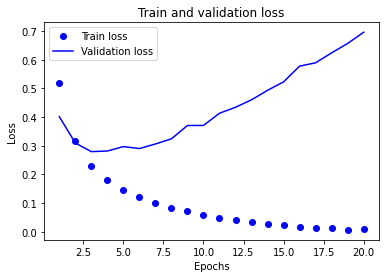

In [30]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label="Train loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Train and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

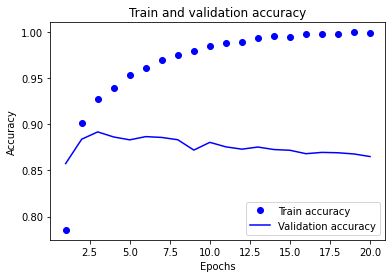

In [31]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label="Train accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation accuracy")
plt.title("Train and validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Model seems to be overfitted. After 2nd epoch it is optimized, and after that moment it's learning to fit well only training data.

Let's do the training once again, only for 4 epochs.

In [32]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 9s 15ms/step - loss: 0.4405 - acc: 0.8265
Epoch 2/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2560 - acc: 0.9102
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.1988 - acc: 0.9278
Epoch 4/4
782/782 [==============================] - 33s 2ms/step - loss: 0.2969 - acc: 0.8834


In [33]:
results

[0.29687416553497314, 0.8833600282669067]

So, with such naive solution, accuracy is 88%.

## Test model

In [34]:
model.predict(x_test)

array([[0.15581492],
       [0.99961644],
       [0.94996107],
       ...,
       [0.09984094],
       [0.05154109],
       [0.39286557]], dtype=float32)

## Summary
- Data needs preprocessing - data samples -> tensors
- *Dense* layers with *ReLU* activation are common in usage
- For binary classification, at the end of the model there should be a layer with *Sigmoid* activation method - so the output values will be in range <0, 1>
- For probability output, loss method should be *binary cross-entropy*
- Optimizer *RMSprop* is good anyway
- While getting know better the input trianing data, NN may overfit it. So loss must be continously controlled